In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('amazon.csv' ,encoding='iso-8859-1', parse_dates=['date'])
# parse_dates, it will convert date into date and time formate,
# datetime64[ns], where ns=Nepali timesystem.

In [3]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [6]:
# check for duplicate data and drop then
data.duplicated().any()

True

In [7]:
data=data.drop_duplicates()

In [8]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [9]:
# Rename Month Names to English
data.columns


Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [10]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [11]:
data['Moth_new']=data['month'].map({
                  'Janeiro':'jan',
                   'Fevereiro':'Feb', 
                   'Março':'March', 
                   'Abril':'April', 
                   'Maio':'May',
                   'Junho': 'June',
                    'Julho':'july',
                    'Agosto':'Agusth', 
                   'Setembro':'Sept', 
                   'Outubro':'oct', 
                   'Novembro':'Nov', 
                   'Dezembro':'Dec'    
})

C:\Users\dell\AppData\Local\Temp\ipykernel_8884\1192243793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Moth_new']=data['month'].map({


In [12]:
data

,year,state,month,number,date,Moth_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec


In [13]:
# total number of Fires Registered
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'Moth_new'], dtype='object')

In [14]:
data['year'].unique()


array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [15]:
data.shape

(6422, 6)

In [16]:
# in which Month Maximum Number of Forest Fires Were Reported

In [17]:
data.groupby('Moth_new')['number'].sum().sort_values(ascending=False).head(1)

Moth_new
july    92319.113
Name: number, dtype: float64

In [18]:
sam=data.groupby('Moth_new')['number'].sum().reset_index()
sam

,Moth_new,number
0,Agusth,88050.435
1,April,28184.770
2,Dec,57535.480
3,Feb,30839.050
4,June,55997.675
5,March,30709.405
6,May,34725.363
7,Nov,85508.054
8,Sept,58578.305
9,jan,47681.844


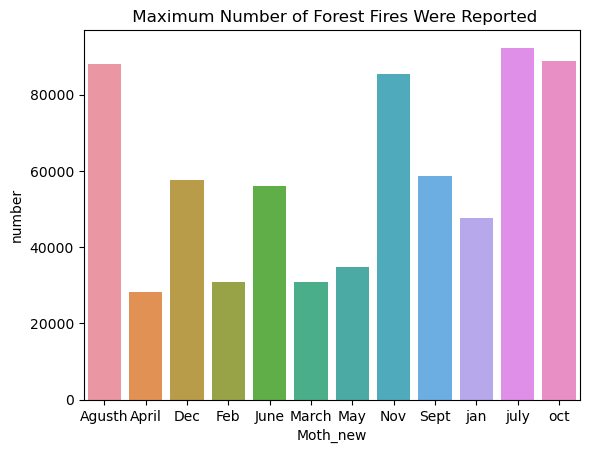

In [19]:
sns.barplot(x='Moth_new',y='number', data=sam)
plt.title(" Maximum Number of Forest Fires Were Reported")
plt.show()

In [20]:
# in which Year Maximum Number of Forest Fires Were Reported
# 6.Find total number of fires where reported in Amazones
# in which state Maximum Number  of forest fires Were reported
# 7 Find the total number of fires were reported in amazonas
# 8. Display Number of Fires were reported in amazones(year-wise)

In [21]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Moth_new'], dtype='object')

In [22]:
data.groupby('Moth_new')['number'].sum().sort_values(ascending=False).head(1)


Moth_new
july    92319.113
Name: number, dtype: float64

# 5.in which Year Maximum Number of Forest Fires Were Reported

In [23]:
# in which Year Maximum Number of Forest Fires Were Reported
data.groupby('year')['number'].sum().sort_values(ascending=False).head(1)

year
2003    42760.674
Name: number, dtype: float64

In [24]:
year_by_number=data.groupby('year')['number'].sum().reset_index()
year_by_number


,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


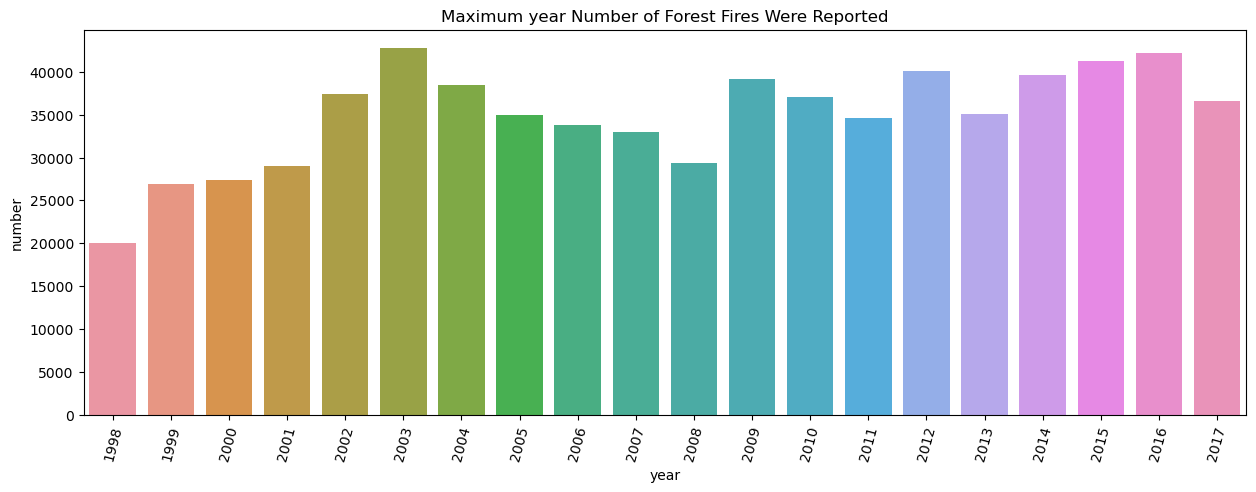

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='number',data=year_by_number)
plt.title("Maximum year Number of Forest Fires Were Reported")
plt.xticks(rotation=75)
plt.show()

# 6.Find total number of fires where reported in Amazones
data.columns

In [26]:
data.shape

(6422, 6)

# 7. in which state Maximum Number  of forest fires Were reported
data.columns

In [27]:
data.groupby('state')['number'].sum().sort_values(ascending=False).head(1)

state
Mato Grosso    96246.028
Name: number, dtype: float64

In [28]:
state_by_number=data.groupby('state')['number'].sum().reset_index()
state_by_number

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


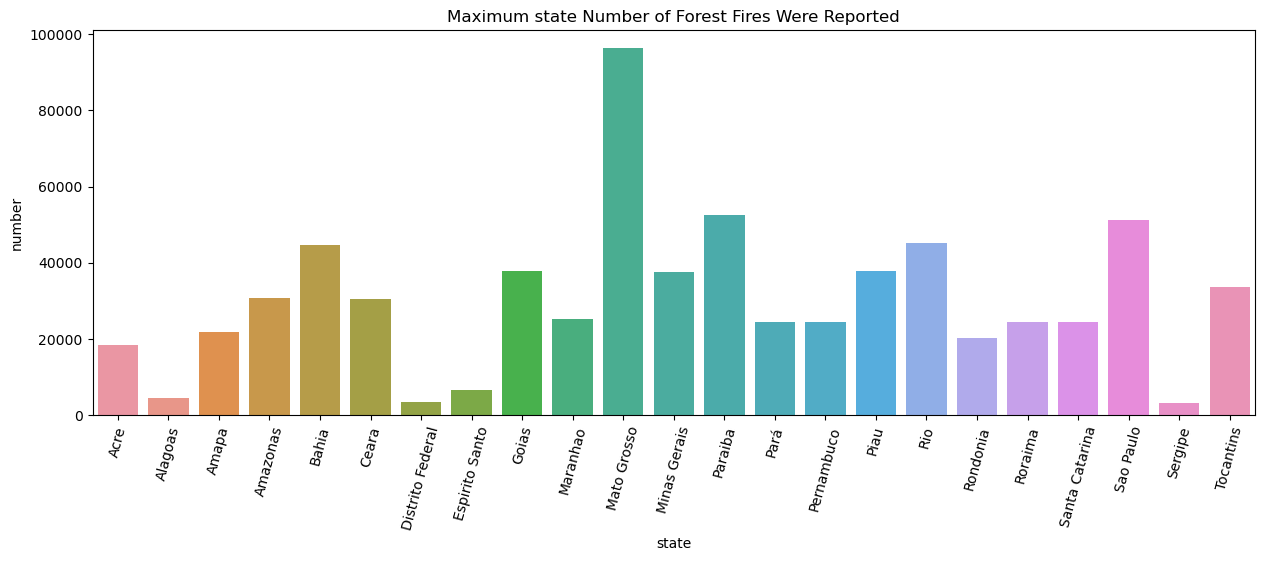

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='state',y='number',data=state_by_number)
plt.title("Maximum state Number of Forest Fires Were Reported")
plt.xticks(rotation=75)
plt.show()


# 8. Display Number of Fires were reported in amazones(year-wise)

data.columns

In [30]:
amazonas=data[data['state']=='Amazonas']
amazonas.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

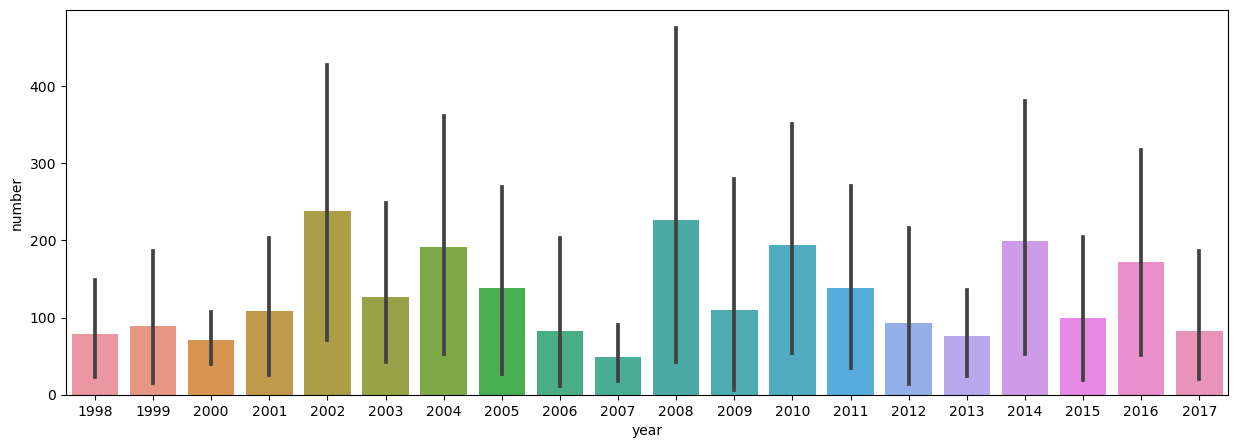

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='number', data=amazonas)


In [32]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Moth_new'], dtype='object')

In [33]:
day=amazonas.groupby(amazonas['date'].dt.dayofweek).sum().number
day

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [34]:
import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day.reset_index()

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


In [35]:
# 10. find total number of fires were reported in 2015 and visualize data based on each month
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Moth_new'], dtype='object')

In [36]:
year=data[data['year']==2015 ]
year.groupby('Moth_new')['number'].sum().reset_index()

,Moth_new,number
0,Agusth,4363.125
1,April,2573.000
2,Dec,4088.522
3,Feb,2309.000
4,June,3260.552
5,March,2202.000
6,May,2384.000
7,Nov,4034.518
8,Sept,2494.658
9,jan,4635.000


In [37]:
# 11. find the average number of  fires were reported from highest to lowest (state-wise)
data.columns
avg_number=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

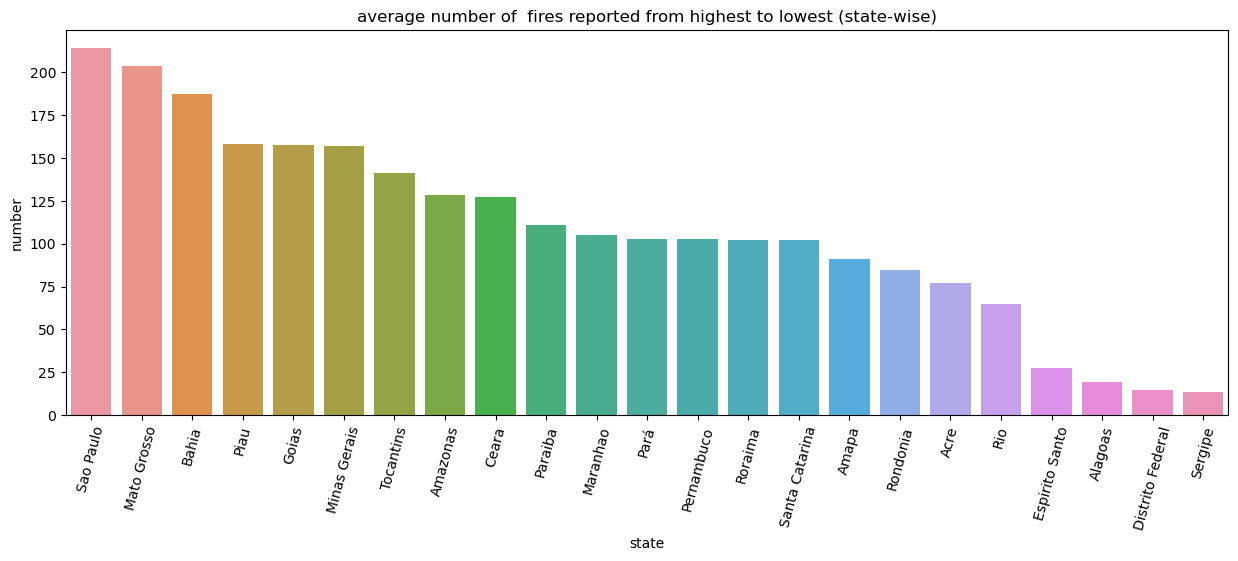

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='state', y='number', data=avg_number)
plt.xticks(rotation=75)
plt.title("average number of  fires reported from highest to lowest (state-wise)")
plt.show()

In [39]:
# to find the state names where fire were reported  in 'Dec month'
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'Moth_new'], dtype='object')

In [40]:
data3=data[data['Moth_new']=='Dec'][['state','Moth_new']].drop_duplicates()
data3

,state,Moth_new
220,Acre,Dec
460,Alagoas,Dec
699,Amapa,Dec
938,Amazonas,Dec
1177,Bahia,Dec
1416,Ceara,Dec
1655,Distrito Federal,Dec
1894,Espirito Santo,Dec
2133,Goias,Dec
2372,Maranhao,Dec
